In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("youtube_data.db")
df = pd.read_csv("Data/0.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
df.to_sql('my_table', conn, if_exists='replace', index=False)
cursor =conn.cursor()

cursor.execute('SELECT * FROM my_table WHERE my_table.age == 653')
result = cursor.fetchall()
print(result) 
# hello
conn.close()
df.head(100)

[('LKh7zAJ4nwo', 'TheReceptionist', 653, 'Entertainment', 424, 13021, 4.34, 1305, 744, 'DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5nI,W1Uo5DQTtzc,E-3zXq_r4w0,1TCeoRPg5dE,yAr26YhuYNY,2ZgXx72XmoE,-7ClGo-YgZ0,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o')]


,video ID,uploader,age,category,length,views,rate,ratings,comments,Related IDs
0,LKh7zAJ4nwo,TheReceptionist,653,Entertainment,424,13021,4.34,1305,744,"DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5n..."
1,7D0Mf4Kn4Xk,periurban,583,Music,201,6508,4.19,687,312,"e2k0h6tPvGc,yuO6yjlvXe8,VqpnWBo-R4E,bdDskrr8jR..."
2,n1cEq1C8oqQ,Pipistrello,525,Comedy,125,1687,4.01,363,141,"eprHhmurMHg,i30NkTJOrak,2XtLgZol5wI,3nH5Tccz8E..."
3,OHkEzL4Unck,ichannel,638,Comedy,299,8043,4.40,518,371,"eyUSTmEUQRg,FDIH1GNQXQE,Wtj31off8-I,mDjwzhc8dQ..."
4,-boOvAGNKUc,mrpitifulband,639,Music,287,7548,4.48,606,386,"fmUwUURgsX0,bR27ACWomug,LlH7WcVptw8,saBmFpuwmK..."
...,...,...,...,...,...,...,...,...,...,...
95,MNxwAU_xAMk,j0sealan,538,Comedy,140,7066676,4.56,14786,7302,"MNxwAU_xAMk,JlfXGGkUcJQ,jwWv2IHywDQ,iqLRRDrHrJ..."
96,RUCZJVJ_M8o,markleung,337,Entertainment,11,6952767,4.21,13932,2558,"RUCZJVJ_M8o,2dE-W9dotQ4,uFoWXi25RBk,0fIeT7zKxR..."
97,HSEnYYpE_V8,boh3m3,736,News & Politics,571,6677,4.72,522,325,"HNcsMlhQdIs,vuUiYEKptAU,bGasrI7m7so,as3DH05Mbk..."
98,FM1KUDE3C3k,renetto,736,News & Politics,1063,9062,4.57,525,488,"LnMvSxl0o0A,IKMtzNuKQso,Bq8ubu7WHkY,Su0VTfwia1..."


{'LKh7zAJ4nwo': ['DjdA-5oKYFQ', 'NxTDlnOuybo', 'c-8VuICzXtU', 'DH56yrIO5nI', 'W1Uo5DQTtzc', 'E-3zXq_r4w0', '1TCeoRPg5dE', 'yAr26YhuYNY', '2ZgXx72XmoE', '-7ClGo-YgZ0', 'vmdPOOd6cxI', 'KRHfMQqSHpk', 'pIMpORZthYw', '1tUDzOp10pk', 'heqocRij5P0', '_XIuvoH6rUg', 'LGVU5DsezE0', 'uO2kj6_D8B4', 'xiDqywcDQRM', 'uX81lMev6_o'], '7D0Mf4Kn4Xk': ['e2k0h6tPvGc', 'yuO6yjlvXe8', 'VqpnWBo-R4E', 'bdDskrr8jRY', 'y3IDp2n7B48', 'JngPWhfCb2M', 'KQaUvH5oiO4', 'NSzrwv5MCwc', 'NHB0a0xtLgU', 'DlRodd4s86s', 'EzKwOYLh-S0', 'eUIfRyrqwp8', 'AK8Wtfwe-1k', 'Eq4hGkIqBGw', 'N1lkLaLJHlc', '-uIffs-DHkM', 'zpTorUhCd8Y', 'AvSK0qPw7EU', 'WX5KLMqY4bM', 'VKFqqoeMdjw'], 'n1cEq1C8oqQ': ['eprHhmurMHg', 'i30NkTJOrak', '2XtLgZol5wI', '3nH5Tccz8EQ', 'bSPVayE0NhE', 'sEqCkwPmQ_w', 'hut3VRL5XRE', 'bWlPSLUT-6U', 'dsBTo5LExr0', '7PSvpPXppXA', 'yLup8wjbSIo', 'lbf4d1pZI9c', 'uRQYan_-CTQ', 'gnpvEvuiFoQ', 'F2_5KOnSsfI', 'DINu35v3eMU', '9uSiyn7t_0o', 'YfShxdbAJS8', 'ssdfqTwZXY0', 'z5wDjq8o60c'], 'OHkEzL4Unck': ['eyUSTmEUQRg', 'FDIH1GNQXQE', 'W

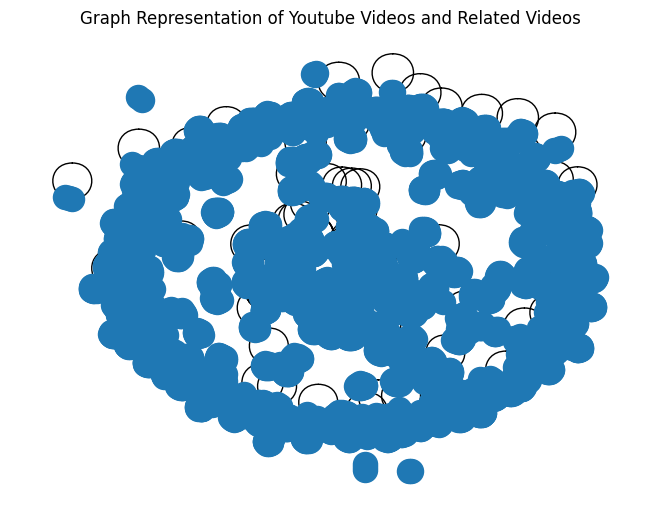

In [5]:
# Read youtube data
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv("Data/0.txt", sep="\t", header=None)
#9th column onwards are related videos
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# convert make adjacency list of video ids and related video ids using maps
adj_list = df.iloc[:, [0, 9]].set_index(0).to_dict()[9]
# separate related video ids into a list
adj_list = {k: v.split(",") for k, v in adj_list.items()}
print(adj_list)
# make graph
G = nx.from_dict_of_lists(adj_list)
# Randomly delete most of the nodes to make the graph look nicer
import random
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
print(G)
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
plt.show()
# Look at video with id LKh7zAJ4nwo
#print(G["LKh7zAJ4nwo"]) # returns dict of related videos


In [6]:

# Find which video has the most related videos
max_degree = 0
max_video = ""
for video in G.nodes():
    if G.degree(video) > max_degree:
        max_degree = G.degree(video)
        max_video = video
print("Video with the most related videos: ", max_video, "with", max_degree, "related videos")


Video with the most related videos:  V6k3YlcYtS0 with 24 related videos


In [7]:

# Implement pagerank
pagerank = nx.pagerank(G)
print(pagerank)
# Find which video has the highest pagerank
max_pagerank = 0
max_video = ""
for video in pagerank:
    if pagerank[video] > max_pagerank:
        max_pagerank = pagerank[video]
        max_video = video
print("Video with the highest pagerank: ", max_video, "with", max_pagerank, "pagerank")

{'LKh7zAJ4nwo': 0.0029029725520111657, '7D0Mf4Kn4Xk': 0.0029029725520111657, 'n1cEq1C8oqQ': 0.0029029725520111657, 'OHkEzL4Unck': 0.0029029725520111657, '-boOvAGNKUc': 0.0029029725520111657, 'hFFH8DaOHQg': 0.0028256492414296857, 'LzHjIj3fpR8': 0.0029029725520111657, 'SDNkMu8ZT68': 0.00029770765108663293, 'PkGUU_ggO3k': 0.0028256492414296857, 'RX24KLBhwMI': 0.0029029725520111657, 'MEvoy_owET8': 0.0028289837244387123, 'w6Pbyg_kcEk': 0.0029029725520111657, 'Qehxjub5lyo': 0.0029029725520111657, 'sRnLdmvQBsI': 0.0028115597484699544, 'xGn0q1zoibw': 0.0028115597484699544, 'zRVts7TFw-Y': 0.0029029725520111657, '_5QUdvUhCZc': 0.0029029725520111657, 'D6U6GxnvlE8': 0.0029029725520111657, 'OUi9-jqq_i0': 0.0028180068035210293, 'bqZauhidT1w': 0.0029029725520111657, 'fQShwYqGqsw': 0.0007797108208620243, 'mWzdp7Cg41w': 0.0029029725520111657, '-keC9GymLpI': 0.0028957135250139068, 'H-ucblRMjuY': 0.0029029725520111657, 'jDRENHHatx4': 0.0029029725520111657, 'ztIH6tc6Aa4': 0.002321913401263354, 'l69Vi5IDc0

In [8]:
# top-k most influential videos
# Check the properties of these videos (# of views, # edges, category…). What can we find out? Present your findings.
import heapq
k = 10
top_k = heapq.nlargest(k, pagerank, key=pagerank.get)
print(top_k)
avg_views = 0
avg_edges = 0
categories = {}
for video in top_k:
    avg_views += df[df[0] == video][5].values[0]
    avg_edges += G.degree(video)
    category = df[df[0] == video][3].values[0]
    if category in categories:
        categories[category] += 1
    else:
        categories[category] = 1

print("Average views of top", k, "videos:", avg_views/k)
print("Average edges of top", k, "videos:", avg_edges/k)
print("Categories of top", k, "videos:", categories)

['wTNlWRbRtS0', 'O9mEKMz2Pvo', 'P1OXAQHv09E', 'c6SHsF1n9Qw', 'LKh7zAJ4nwo', '7D0Mf4Kn4Xk', 'n1cEq1C8oqQ', 'OHkEzL4Unck', '-boOvAGNKUc', 'LzHjIj3fpR8']
Average views of top 10 videos: 470866.9
Average edges of top 10 videos: 20.5
Categories of top 10 videos: {'Comedy': 5, 'Music': 4, 'Entertainment': 1}


 Pearson Correlation Coefficient: 0.12171943127289389
P-value: 0.09522167026843129
Spearman Rank Correlation Coefficient: -0.13134562394536706
P-value: 0.07161818544899273
Covariance: 409.2274495885369


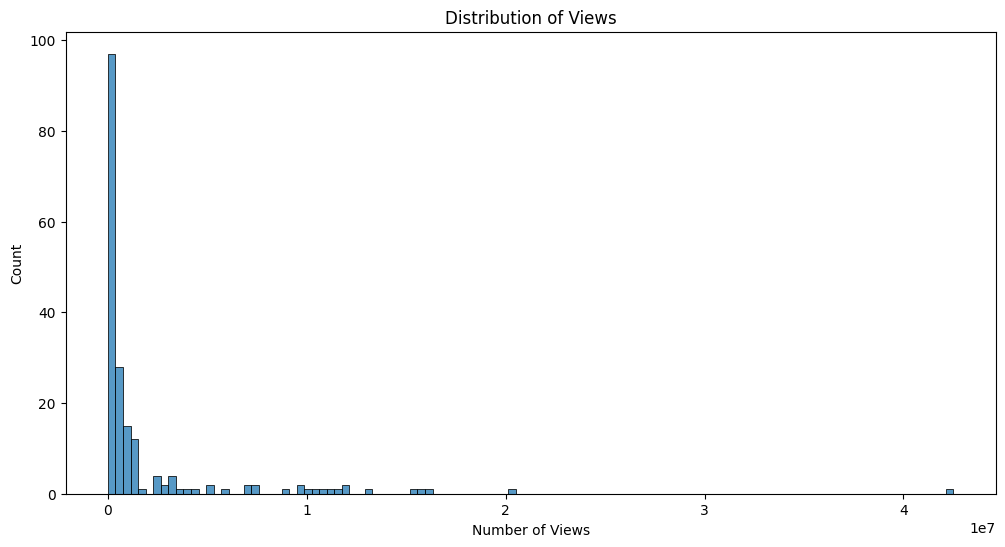

In [10]:

import numpy as np
import scipy.stats
import seaborn as sns

# Relationship between pagerank and views
#correlation analysis 
common_video_ids = set(pagerank.keys()) & set(df[0].values)
pagerank_values = np.array([pagerank[video] for video in common_video_ids])
views_values = np.array([df[df[0] == video][5].values[0] for video in common_video_ids])
# Calculate the correlation coefficient and p-value
corr_coeff, p_value = scipy.stats.pearsonr(pagerank_values, views_values)

#get pearson correlation
print(" Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Calculate the correlation coefficient and p-value for spearman
spearman_coefficient, spearman_p_value = scipy.stats.spearmanr(pagerank_values, views_values)
print("Spearman Rank Correlation Coefficient:", spearman_coefficient)
print("P-value:", spearman_p_value)

#show covariance of relationship
cov_matrix = np.cov(pagerank_values, views_values)
covariance = cov_matrix[0, 1]
print("Covariance:", covariance)

#plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[5])
plt.title('Distribution of Views')
plt.xlabel('Number of Views')
plt.show()


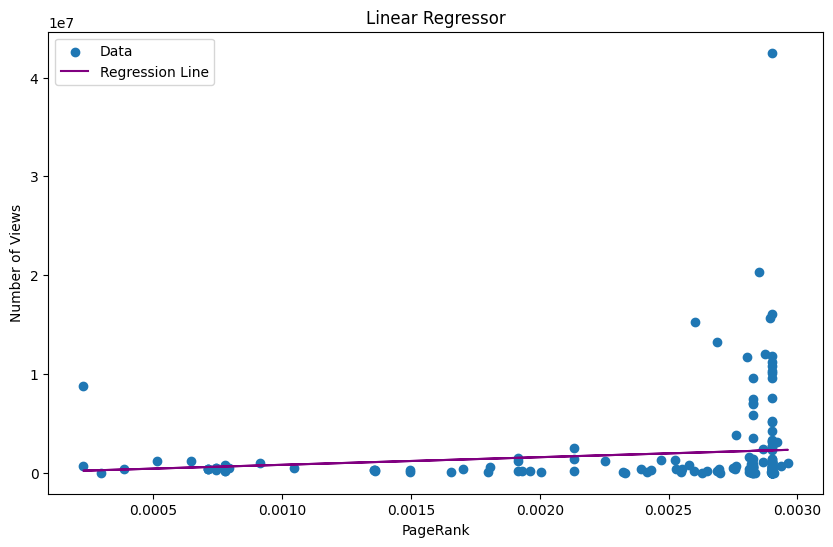

In [13]:
from sklearn.linear_model import LinearRegression

# Reshape for linear regression
pagerank_values_reshaped = pagerank_values.reshape(-1, 1)

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(pagerank_values_reshaped, views_values)

# Get slope and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Plot scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(pagerank_values, views_values, label='Data')
plt.plot(pagerank_values, regressor.predict(pagerank_values_reshaped), color='purple',  label='Regression Line')
plt.title('Linear Regressor')
plt.xlabel('PageRank')
plt.ylabel('Number of Views')
plt.legend()
plt.show()

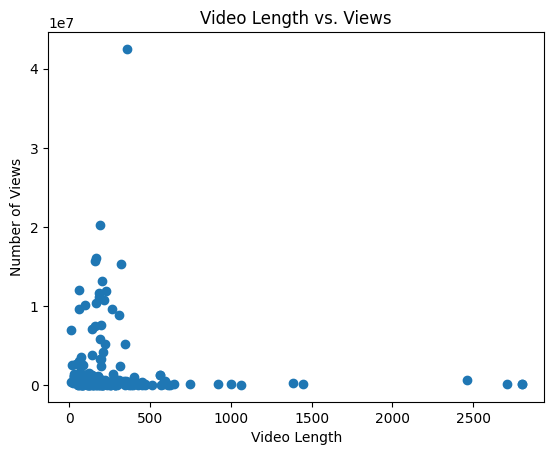

In [14]:
#relationship between video length and views
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df[4], df[5])
plt.title('Video Length vs. Views')
plt.xlabel('Video Length')
plt.ylabel('Number of Views')
plt.show()

C:\Users\westo\AppData\Local\Temp\ipykernel_73136\251739118.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


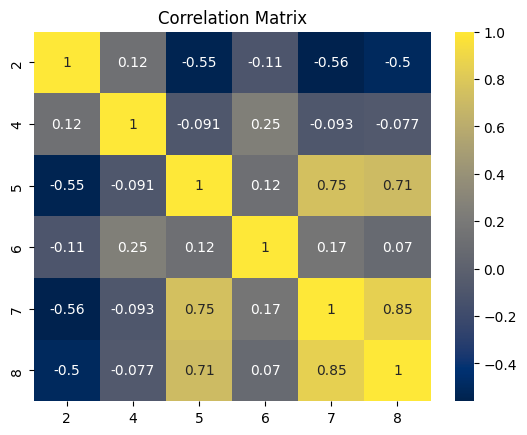

In [15]:
#correlation matrix between each of the features 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

In [16]:
#Read Data + Raw 
import pandas as pd
import sqlite3

df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]

print(df["Related IDs"]) 
# hello



0        PF_ZMlw4rHs,c3XKOAxKc_w,yr73064QrGE,atfNL0_KAc...
1        C2FZX1ivWnM,cX6f43aYQII,h9fNKnZqq0M,qEoKnmLAND...
2        mCkCcEsLBQc,h_HFYtLUQUU,T7HTpO76gjk,Bji0d-PCxo...
3        y5kwKp6y8t4,oHknurFKx64,LpCCsPergb4,vcVYexixsm...
4        4JXPZapLVVw,TfG36T7Ms74,gfayO0hBWc8,XETLf3u43u...
                               ...                        
23538    9PRWMOBEt88,ATP2D_gFGkY,xl8L4NdUo2c,o4x-VW_rCS...
23539    wybJtnXIOJg,0DUh_5G7Rbs,JPKb2SrbZfE,oPsCG_o8b_...
23540    o4x-VW_rCSE,UA-Ixo5DlfY,BrupD4_EFGA,g76ql9lv3Y...
23541    a_RKaDGNQ98,o4x-VW_rCSE,8kOs3J0a2aI,QCEnN8eNCe...
23542    Ct4TWq5fd-E,tzwdwOU71mE,D1oxSoNa2Xk,vDhMiJzkKf...
Name: Related IDs, Length: 23543, dtype: object


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is your DataFrame
categories = df['category'].tolist()

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the categories
category_counts = vectorizer.fit_transform(categories)

# Summing the counts of each category
sum_words = category_counts.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Get the most common category
most_common_category = words_freq[0][0]

print(f"The most common category is: {most_common_category}")

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]


# Apply CountVectorizer to the 'category' column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['category'])

# Convert to DataFrame for easier handling
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Create a plot
plt.figure(figsize=(8, 6))
count_vect_df.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Category Frequency')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

category = countvectorizer.fit_transform(df['category'])
uploader = tfidfvectorizer.fit_transform(df['uploader'])

#retrieve the terms found in the corpora
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = category.toarray(),index = list(df.index.values) ,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = uploader.toarray(),index = list(df.index.values) ,columns = tfidf_tokens)

print("Category\n")
print(df_countvect)


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

category = countvectorizer.fit_transform(df['category'])
uploader = tfidfvectorizer.fit_transform(df['uploader'])

#retrieve the terms found in the corpora
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = category.toarray(),index = list(df.index.values) ,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = uploader.toarray(),index = list(df.index.values) ,columns = tfidf_tokens)

print("Uploader\n")
print(df_countvect)

ValueError: np.nan is an invalid document, expected byte or unicode string.

{'LKh7zAJ4nwo': ['DjdA-5oKYFQ', 'NxTDlnOuybo', 'c-8VuICzXtU', 'DH56yrIO5nI', 'W1Uo5DQTtzc', 'E-3zXq_r4w0', '1TCeoRPg5dE', 'yAr26YhuYNY', '2ZgXx72XmoE', '-7ClGo-YgZ0', 'vmdPOOd6cxI', 'KRHfMQqSHpk', 'pIMpORZthYw', '1tUDzOp10pk', 'heqocRij5P0', '_XIuvoH6rUg', 'LGVU5DsezE0', 'uO2kj6_D8B4', 'xiDqywcDQRM', 'uX81lMev6_o'], '7D0Mf4Kn4Xk': ['e2k0h6tPvGc', 'yuO6yjlvXe8', 'VqpnWBo-R4E', 'bdDskrr8jRY', 'y3IDp2n7B48', 'JngPWhfCb2M', 'KQaUvH5oiO4', 'NSzrwv5MCwc', 'NHB0a0xtLgU', 'DlRodd4s86s', 'EzKwOYLh-S0', 'eUIfRyrqwp8', 'AK8Wtfwe-1k', 'Eq4hGkIqBGw', 'N1lkLaLJHlc', '-uIffs-DHkM', 'zpTorUhCd8Y', 'AvSK0qPw7EU', 'WX5KLMqY4bM', 'VKFqqoeMdjw'], 'n1cEq1C8oqQ': ['eprHhmurMHg', 'i30NkTJOrak', '2XtLgZol5wI', '3nH5Tccz8EQ', 'bSPVayE0NhE', 'sEqCkwPmQ_w', 'hut3VRL5XRE', 'bWlPSLUT-6U', 'dsBTo5LExr0', '7PSvpPXppXA', 'yLup8wjbSIo', 'lbf4d1pZI9c', 'uRQYan_-CTQ', 'gnpvEvuiFoQ', 'F2_5KOnSsfI', 'DINu35v3eMU', '9uSiyn7t_0o', 'YfShxdbAJS8', 'ssdfqTwZXY0', 'z5wDjq8o60c'], 'OHkEzL4Unck': ['eyUSTmEUQRg', 'FDIH1GNQXQE', 'W

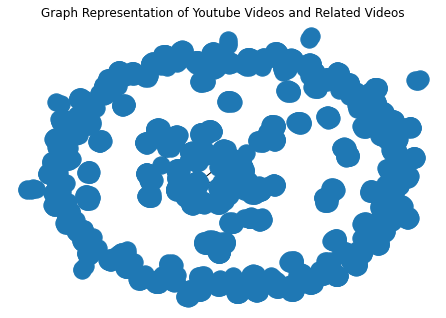

In [41]:
# Read youtube data
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv("Data/2.txt", sep="\t", header=None)
#9th column onwards are related videos
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# convert make adjacency list of video ids and related video ids using maps
adj_list = df.iloc[:, [0, 9]].set_index(0).to_dict()[9]
# separate related video ids into a list
adj_list = {k: v.split(",") for k, v in adj_list.items()}
print(adj_list)
# make graph
G = nx.from_dict_of_lists(adj_list)
# Randomly delete most of the nodes to make the graph look nicer
import random
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
# Look at video with id LKh7zAJ4nwo
print(G["LKh7zAJ4nwo"]) # returns dict of related videos

In [23]:
#this code is to compare normal query with index query 
import pandas as pd
import sqlite3
import csv
import time 

df = pd.read_csv("Data/0.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
#name the column 
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]

#save Dataframe to SQLite 
conn = sqlite3.connect("youtube_data.db")
df.to_sql('my_table', conn, if_exists='replace', index=False)
cursor =conn.cursor()


    
#Execute the NORMAL query and save the result in DataFrame table 
start_time = time.time()
cursor.execute('SELECT * FROM my_table WHERE my_table.age == 721')
result = cursor.fetchall()
duration_normal = time.time()-start_time
start_time = time.time()
cursor.execute('SELECT * FROM my_table WHERE ROWID IN (SELECT ROWID FROM my_table WHERE my_table.age == 721)')
result_index = cursor.fetchall()
duration_index = time.time()-start_time



df_normal = pd.DataFrame(result, columns=df.columns)
df_index = pd.DataFrame(result_index, columns=df.columns)
print(f'The time normal query takes: {duration_normal}')
print(f'The time index query takes: {duration_index}')
print("Normal Query Result:")
print(df_normal.to_string(index=True))  # Change index=True if you want to include the index
print("\nIndex Query Result:")
print(df_index.to_string(index=False))


save_normal = "normal_query_rating.csv"
save_index = "index_query_rating.csv"

df_normal.to_csv(save_normal, index=False)
df_index.to_csv(save_index, index=False)



The time normal query takes: 0.0
The time index query takes: 0.0
Normal Query Result:
      video ID    uploader  age category  length    views  rate  ratings  comments                                                                                                                                                                                                                                      Related IDs
0  C0f2dHJ6A18  vlogkarate  721   Comedy     124  1510728  4.40     7565      3502  rziIF1byVms,aIl_m9Q8i-M,ZM9YgjrN-7I,snk-An1ZuJA,z_BqWHX1bSM,Ryt3jCEiOZA,8Cz_HEh6L3k,lFH9hN3K-Js,dmYYTownZEQ,BwEakCm3c1c,jIoGyESknng,k93suUhwfXw,DTg6n5EV6jI,QnoLALdjZBU,34RGjnTIi7w,h2W03sKKp7o,vM_nTgG8chQ,JnF5-boed9c,bQpgh2an1KU,Zr2XKAEI0oQ
1  wTNlWRbRtS0  xgobobeanx  721   Comedy     404   951650  2.65     2914      2336  lSqhBqmqz4w,INEqI_e6hR8,68g7oUPjdbI,E9oCH3DEvV4,WLENMMililk,ptiaOONdsUM,8FyuNYxFjtA,Qd-aTsqvqJQ,oAFV0s9NhJc,Zwprh_SvTa8,5wdN3S9ocT8,77ey1aWDnyY,VW0OgGmODKk,ag06IgVN60k,OEFAy19GE4c,zi

One Thing notice is that if the result for query is small the time for index is smaller than normal (example age == 721)

In [82]:
#Will do data aggregation 
#Lets find the average of ratings and median as well as max 
import numpy as np 
normal_avg = np.mean(df["ratings"])
normal_min = np.min(df["ratings"])
normal_median = np.median(df["ratings"])
normal_max = np.max(df["ratings"])
print(f'avg : {normal_avg}, min : {normal_min}, max : {normal_max}, median : {normal_median}')

conn = sqlite3.connect("youtube_data.db")
df.to_sql('my_table', conn, if_exists='replace', index=False)
cursor =conn.cursor()

#Execute the NORMAL query and save the result in DataFrame table 
start_time = time.time()
query= "SELECT * FROM my_table WHERE my_table.ratings > ?"
cursor.execute(query, (normal_avg,))
result = cursor.fetchall()
duration_normal = time.time()-start_time


start_time = time.time()
cursor.execute("SELECT * FROM my_table WHERE ROWID IN (SELECT ROWID FROM my_table WHERE my_table.ratings > ?)", (normal_avg,))
result_index = cursor.fetchall()
duration_index = time.time() - start_time

conn.close()

df_normal = pd.DataFrame(result, columns=df.columns)
df_index = pd.DataFrame(result_index, columns=df.columns)
print(f'The time normal query takes: {duration_normal}')
print(f'The time index query takes: {duration_index}')
print("Normal Query Result:")
print(df_normal.to_string(index=True))  # Change index=True if you want to include the index
print("\nIndex Query Result:")
print(df_index.to_string(index=False))


avg : 37.037908135030435, min : 0.0, max : 9279.0, median : nan
The time normal query takes: 0.003014087677001953
The time index query takes: 0.003988027572631836
Normal Query Result:
        video ID              uploader    age          category  length       views  rate  ratings  comments                                                                                                                                                                                                                                      Related IDs
0    hP4mS2nnfus             tasmonkey  741.0            Sports    28.0     45481.0  4.54     41.0      53.0                          D3PZXxx57-4,15VIqMXdKHU,hXUSmfSaTBw,qbR7WRXIO-E,RDrA0bWPlhU,h6Ghupxbj9g,O1dXfikoYoQ,F8NQ7NELo40,BAhVfmm1--k,UZcvur6dBqM,-QrG5aspGv4,_-lcaXabZ8I,1lYXY_eTNY8,SPSHB1B65-4,Ho-DLeAdZj4,8nTFFRtGb4M,-vFRkOd3GjY,rt-ytACeVM0
1    rt-ytACeVM0             JACKinNYC  379.0    People & Blogs    30.0    126471.0  4.70    149.0      11.0  4ApDDm

/Users/quyenhuynh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


    video ID              uploader    age          category  length       views  rate  ratings  comments                                                                                                                                                                                                                                      Related IDs
 hP4mS2nnfus             tasmonkey  741.0            Sports    28.0     45481.0  4.54     41.0      53.0                          D3PZXxx57-4,15VIqMXdKHU,hXUSmfSaTBw,qbR7WRXIO-E,RDrA0bWPlhU,h6Ghupxbj9g,O1dXfikoYoQ,F8NQ7NELo40,BAhVfmm1--k,UZcvur6dBqM,-QrG5aspGv4,_-lcaXabZ8I,1lYXY_eTNY8,SPSHB1B65-4,Ho-DLeAdZj4,8nTFFRtGb4M,-vFRkOd3GjY,rt-ytACeVM0
 rt-ytACeVM0             JACKinNYC  379.0    People & Blogs    30.0    126471.0  4.70    149.0      11.0  4ApDDm-XXro,cXyRTouFNYU,leOm0yFxZTY,nGIX5wH4w0Y,_gv4g3mxjbM,VXuv-qCahvo,7s2DuAsSe30,fa66ipfK7fU,waZPGtjuzHg,8ZQgNZ3gBmM,B2YwPN_Vus0,eFF8IKiJGbs,tftQYNXx5eI,pvpfupTrdhA,SPVvtStZg_4,TRfjhLWeGB4,lEueoXlbAA

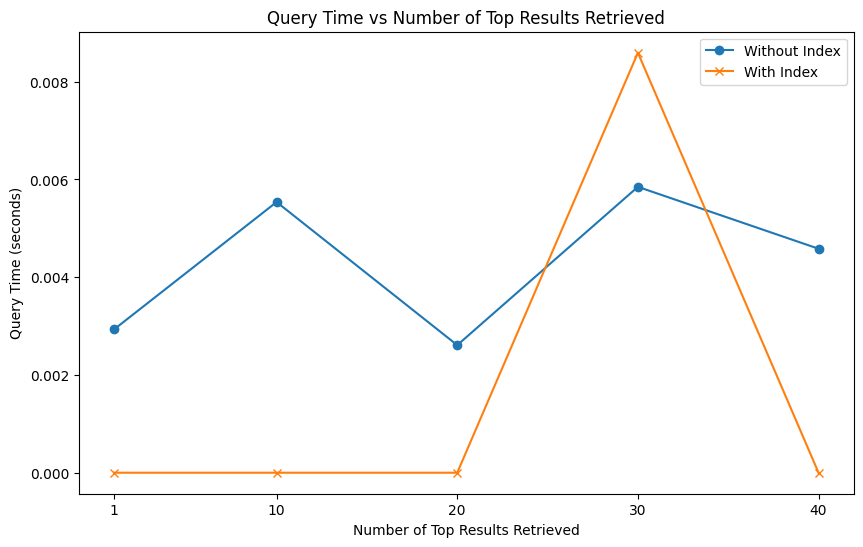

In [39]:
import pandas as pd
import sqlite3
import time
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("youtube_data.db")

# Create an index on 'views'
conn.execute('CREATE INDEX IF NOT EXISTS idx_views ON my_table(views)')

# Define the number of top results to fetch
top_limits = [1, 10, 20, 30, 40]  # You can extend this range as needed

# Initialize lists to store results
times_without_index = []
times_with_index = []

# Function to measure query time
def measure_query_time(query):
    start_time = time.time()
    pd.read_sql_query(query, conn)
    duration = time.time() - start_time
    return duration

# Perform queries without index
conn.execute('DROP INDEX IF EXISTS idx_views')
for limit in top_limits:
    query = f"SELECT * FROM my_table WHERE category = 'Comedy' ORDER BY views DESC LIMIT {limit}"
    duration = measure_query_time(query)
    times_without_index.append(duration)

# Perform queries with index
conn.execute('CREATE INDEX IF NOT EXISTS idx_views ON my_table(views)')
for limit in top_limits:
    query = f"SELECT * FROM my_table WHERE category = 'Comedy' ORDER BY views DESC LIMIT {limit}"
    duration = measure_query_time(query)
    times_with_index.append(duration)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(top_limits, times_without_index, label='Without Index', marker='o')
plt.plot(top_limits, times_with_index, label='With Index', marker='x')
plt.xlabel('Number of Top Results Retrieved')
plt.ylabel('Query Time (seconds)')
plt.title('Query Time vs Number of Top Results Retrieved')
plt.xticks(top_limits)
plt.legend()
plt.show()

# Close the connection
conn.close()


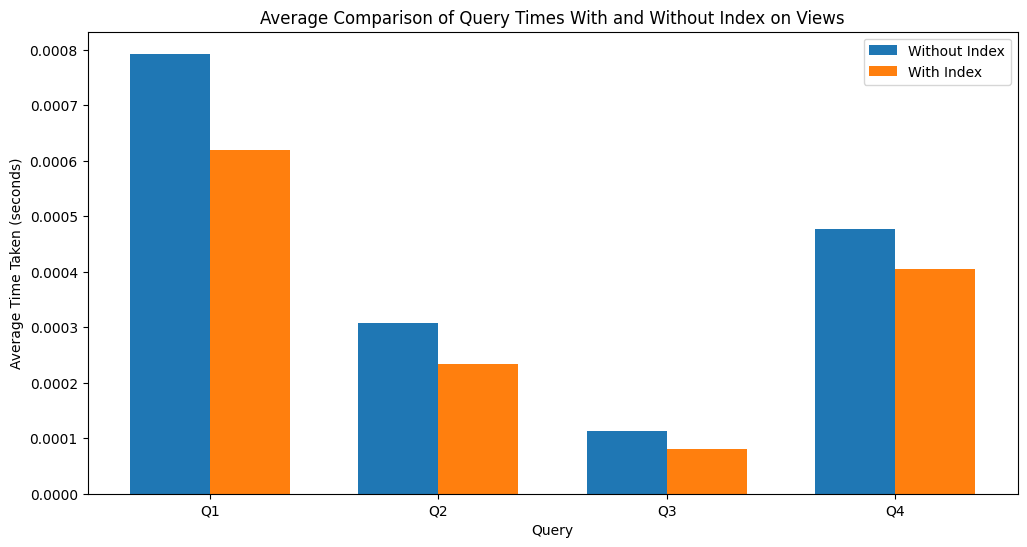

In [54]:
import sqlite3
import time
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("youtube_data.db")
cursor = conn.cursor()

# Define a set of queries
queries = [
    "SELECT * FROM my_table WHERE views > 10000",
    "SELECT * FROM my_table WHERE views BETWEEN 5000 AND 100000",
    "SELECT AVG(views) FROM my_table WHERE views > 5000",
    "SELECT *, views FROM my_table ORDER BY views DESC LIMIT 100"
]

# Function to measure average query execution time over multiple trials
def execute_query_multiple_times(query, trials=100):
    total_time = 0
    for _ in range(trials):
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        total_time += time.time() - start_time
    return total_time / trials

# Measure average times without index
times_without_index = []
for query in queries:
    time_taken = execute_query_multiple_times(query)
    times_without_index.append(time_taken)

# Create an index on 'views'
cursor.execute("CREATE INDEX IF NOT EXISTS idx_views ON my_table(views)")

# Measure average times with index
times_with_index = []
for query in queries:
    time_taken = execute_query_multiple_times(query)
    times_with_index.append(time_taken)

# Visualize the results
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(queries))

plt.bar(index, times_without_index, bar_width, label='Without Index')
plt.bar([i + bar_width for i in index], times_with_index, bar_width, label='With Index')
plt.xlabel('Query')
plt.ylabel('Average Time Taken (seconds)')
plt.title('Average Comparison of Ranged Query Times With and Without Index on Views')
plt.xticks([i + bar_width / 2 for i in index], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.show()

# Close the connection
conn.close()


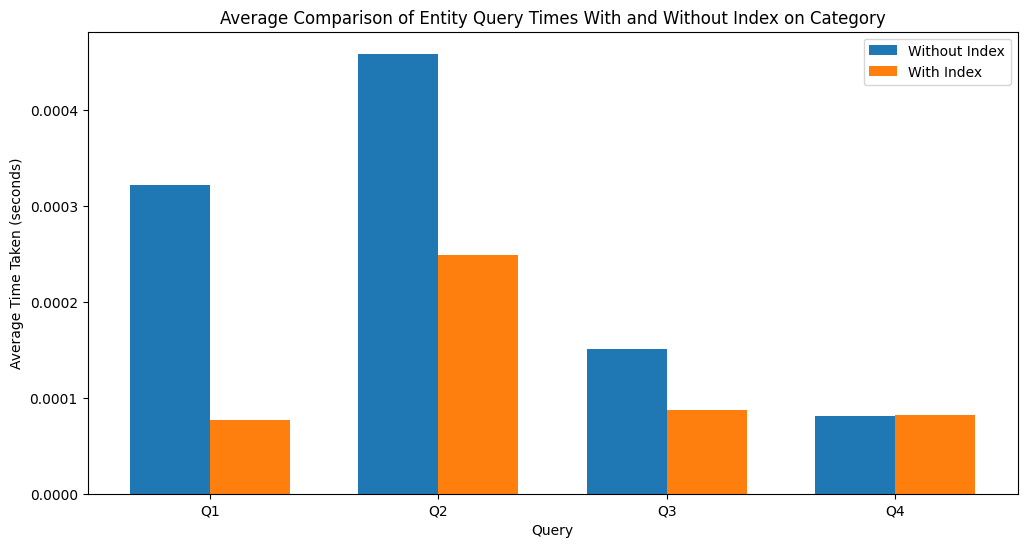

In [57]:
import sqlite3
import time
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("youtube_data.db")
cursor = conn.cursor()

# Define a set of entity queries
queries = [
    "SELECT * FROM my_table WHERE rate = 5 AND category = 'Sport'",
    "SELECT * FROM my_table WHERE rate > 4 AND category = 'Music'",
    "SELECT * FROM my_table WHERE rate <= 3 AND category = 'News'",
    "SELECT * FROM my_table WHERE rate = 4 AND category = 'Entertainment'"
]

# Function to measure average query execution time over multiple trials
def execute_query_multiple_times(query, trials=100):
    total_time = 0
    for _ in range(trials):
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        total_time += time.time() - start_time
    return total_time / trials

# Measure average times without index
times_without_index = []
for query in queries:
    time_taken = execute_query_multiple_times(query)
    times_without_index.append(time_taken)

# Create an index on 'category'
cursor.execute("CREATE INDEX IF NOT EXISTS idx_category ON my_table(category)")

# Measure average times with index
times_with_index = []
for query in queries:
    time_taken = execute_query_multiple_times(query)
    times_with_index.append(time_taken)

# Visualize the results
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(queries))

plt.bar(index, times_without_index, bar_width, label='Without Index')
plt.bar([i + bar_width for i in index], times_with_index, bar_width, label='With Index')
plt.xlabel('Query')
plt.ylabel('Average Time Taken (seconds)')
plt.title('Average Comparison of Entity Query Times With and Without Index on Category')
plt.xticks([i + bar_width / 2 for i in index], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.show()

# Close the connection
conn.close()


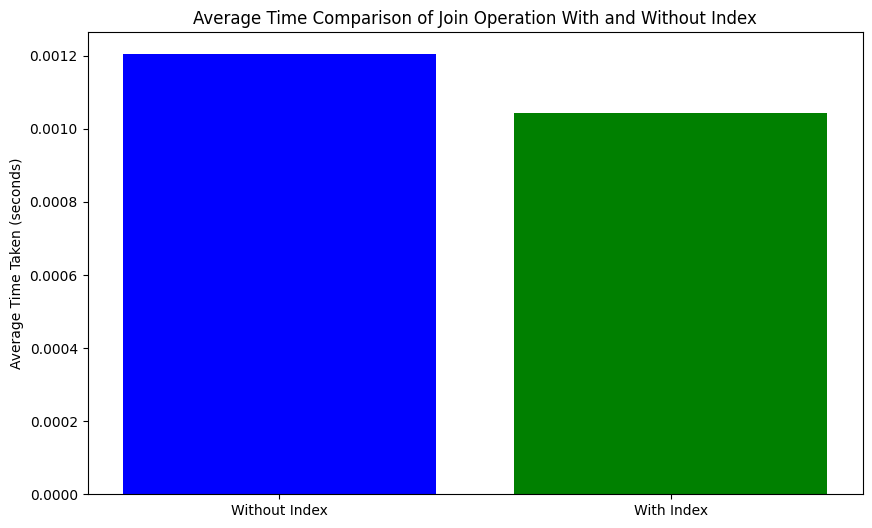

In [58]:
import sqlite3
import time
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect("youtube_data.db")
cursor = conn.cursor()

# Create two example tables
cursor.execute("DROP TABLE IF EXISTS videos")
cursor.execute("DROP TABLE IF EXISTS categories")
cursor.execute("CREATE TABLE videos (video_id INTEGER PRIMARY KEY, category_id INTEGER, title TEXT)")
cursor.execute("CREATE TABLE categories (category_id INTEGER PRIMARY KEY, category_name TEXT)")

# Insert sample data into tables
categories_data = [(1, 'Music'), (2, 'Sport'), (3, 'News')]
videos_data = [(i, np.random.randint(1, 4), f'Video {i}') for i in range(1, 1001)]
cursor.executemany("INSERT INTO categories VALUES (?, ?)", categories_data)
cursor.executemany("INSERT INTO videos VALUES (?, ?, ?)", videos_data)

# Function to measure query execution time
def measure_query_time(query, trials=100):
    total_time = 0
    for _ in range(trials):
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        total_time += time.time() - start_time
    return total_time / trials

# Define join query
join_query = "SELECT v.title, c.category_name FROM videos v JOIN categories c ON v.category_id = c.category_id"

# Measure time without index
time_without_index = measure_query_time(join_query)

# Create indexes on join columns
cursor.execute("CREATE INDEX IF NOT EXISTS idx_category_id ON videos(category_id)")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_category_id_cat ON categories(category_id)")

# Measure time with index
time_with_index = measure_query_time(join_query)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(['Without Index', 'With Index'], [time_without_index, time_with_index], color=['blue', 'green'])
plt.ylabel('Average Time Taken (seconds)')
plt.title('Average Time Comparison of Join Operation With and Without Index')
plt.show()

# Close the connection
conn.close()
